Импорт библиотек

In [13]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pandas as pd

Чтение файла

In [3]:
with open('Москва_2021.txt', 'r') as file:
    boba = list(map(int, file.readlines()))
print(boba)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

Задание №1: Построение выборок и подсчет средних

In [4]:
# Подсчет объема выборок
y = 0.95
# Φ(t) = 0.95/2 = 0,4750. По функции Лапласа:
t = 1.96
N = 32423
d = 3
D = 144.9169680648149

n = int(t**2*D/d**2)

print(f'Объем выборок: {n}')

# Функция для вычисления выборочной средней
def calculate_average(selection):
    total = 0
    for age in selection:
        total += age
    return total / len(selection)

# Генерация выборок и расчет выборочной средней
averages = []
selections = []
for _ in range(36):
    selection = random.choices(boba, k=n)
    selections.append(selection)
    average = calculate_average(selection)
    averages.append(average)

# Результаты
print(f'Выборочные средние: {averages}')
print(f'Выборки: {selections}')

Объем выборок: 61
Выборочные средние: [37.459016393442624, 35.24590163934426, 36.24590163934426, 35.98360655737705, 36.63934426229508, 33.63934426229508, 35.40983606557377, 35.73770491803279, 32.950819672131146, 35.85245901639344, 35.704918032786885, 32.22950819672131, 34.721311475409834, 34.131147540983605, 34.967213114754095, 37.90163934426229, 33.950819672131146, 36.32786885245902, 34.885245901639344, 35.131147540983605, 35.14754098360656, 35.114754098360656, 34.868852459016395, 36.459016393442624, 36.47540983606557, 37.26229508196721, 36.67213114754098, 35.52459016393443, 35.09836065573771, 35.885245901639344, 35.557377049180324, 37.26229508196721, 33.32786885245902, 35.16393442622951, 34.26229508196721, 34.83606557377049]
Выборки: [[32, 27, 49, 66, 40, 21, 45, 71, 22, 33, 27, 22, 25, 42, 45, 34, 36, 38, 18, 29, 40, 35, 28, 49, 37, 43, 49, 49, 60, 20, 57, 19, 33, 24, 48, 40, 41, 46, 40, 41, 20, 44, 36, 33, 38, 30, 26, 40, 25, 36, 36, 43, 20, 20, 47, 45, 38, 33, 22, 67, 65], [32, 22

Задание №2: построить интервальный ряд распределения, вычислить относительные частоты, построить гистограмму.

32 38
[0.05555555555555555, 0.08333333333333333, 0.19444444444444445, 0.3888888888888889, 0.16666666666666666, 0.1111111111111111]


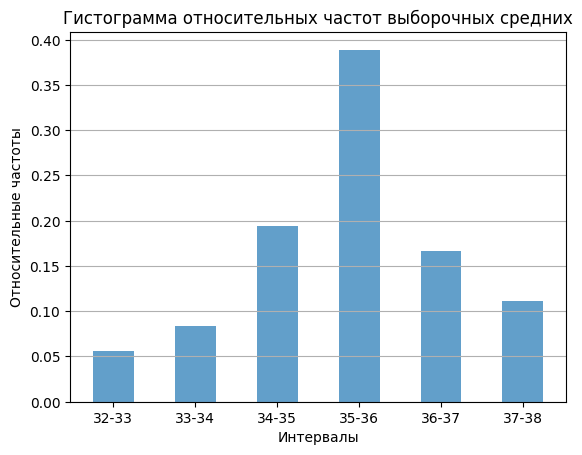

,Интервалы,Частоты
0,32-33,2
1,33-34,3
2,34-35,7
3,35-36,14
4,36-37,6
5,37-38,4


In [11]:
# Сортируем массив averages и берем уникальные значения
sortedAverages = sorted(averages)
leftBorder = math.floor(min(averages))
rightBorder = math.ceil(max(averages))

print(leftBorder,rightBorder)

# Создаем интервальный ряд распределения
intervals = []
current = leftBorder

while current < rightBorder:
    intervals.append((current, current + 1))  # Длина интервала 1 год
    current += 1

# Вычисляем частоты
frequency = [0] * len(intervals)

for avg in sortedAverages:
    for i, (left, right) in enumerate(intervals):
        if left <= avg < right:
            frequency[i] += 1
            break

# Построение таблицы интервального ряда распределения
data = {
    'Интервалы': [f"{left}-{right}" for left, right in intervals],
    'Частоты': frequency
}

df = pd.DataFrame(data)

# Вычисляем относительные частоты
relative_frequencies = [f / len(sortedAverages) for f in frequency]

print(relative_frequencies)

# Построение гистограммы
plt.bar(range(len(intervals)), relative_frequencies, width=0.5, align='center', alpha=0.7)
plt.xticks(range(len(intervals)), [f"{left}-{right}" for left, right in intervals])
plt.title('Гистограмма относительных частот выборочных средних')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.grid(axis='y')
plt.show()

df

Задание №3: осуществить выравнивание статистического ряда, построить кривую Гаусса.

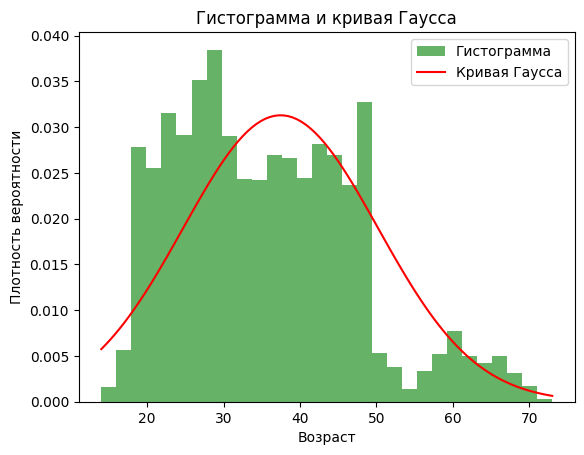

In [14]:
# Метод моментов: оценка среднего и дисперсии
mean_sample = sum(selections[0]) / len(selections[0])
variance_sample = sum((x - mean_sample) ** 2 for x in selections[0]) / (len(selections[0]) - 1)

# Параметры нормального распределения
mu = mean_sample
sigma = variance_sample ** 0.5

# Построение гистограммы
plt.hist(boba, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма')

# Построение кривой Гаусса
x = np.linspace(min(boba), max(boba), 100)
gaussian_curve = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, gaussian_curve, 'r', label='Кривая Гаусса')
plt.title('Гистограмма и кривая Гаусса')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Задание №4: найти доверительный интервал

In [19]:
# Оценка среднего и дисперсии
mean = sum(selections[0]) / len(selections[0])
variance = sum((x - mean_sample) ** 2 for x in selections[0]) / (len(selections[0]) - 1)

# Уровень значимости
alpha = 0.05  # (1 - y)
n = len(selections[0])

# t-критическое значение
t_critical = 2.030  # Для 35 степеней свободы (n-1) и уровня значимости 0.05

# Стандартная ошибка
standard_error = (variance / n) ** 0.5  

# Доверительный интервал
confidence_interval = (mean - t_critical * standard_error,
                       mean + t_critical * standard_error)

print(f"Доверительный интервал для среднего возраста: {confidence_interval}")


Доверительный интервал для среднего возраста: (34.146903473419606, 40.77112931346564)
